<h1>Data Preparation</h1><h2 align="center">Scaling</h2>

<h3>Standard Scaler</h3>

In [2]:
from pandas import read_csv, DataFrame, Series
from sklearn.preprocessing import StandardScaler

# Load the data
file = "covid"
data: DataFrame = read_csv("../../../data/class_pos_covid_mvi_50_perc_rec_most_frequent_for_symbolic_and_binary_mean_for_numeric.csv", na_values="") # data/class_pos_covid.csv
target = "CovidPos"

# Separate the target variable
target_data: Series = data.pop(target)

# Select only numeric variables from the dataset
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Initialize and fit the scaler
transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(
    numeric_data
)

# Transform the numeric data and convert it back to DataFrame
df_numeric_scaled = DataFrame(transf.transform(numeric_data), index=numeric_data.index, columns=numeric_data.columns)

# Add the target variable back
df_numeric_scaled[target] = target_data

# If you want to include non-numeric data as well (without scaling), you can join the non-numeric data back
non_numeric_data = data.select_dtypes(exclude=['int64', 'float64'])
df_zscore = df_numeric_scaled.join(non_numeric_data)

# Save the scaled data
df_zscore.to_csv(f"../../../data/{file}_scaled_zscore.csv", index="id")


<h3>MinMax Scaler</h3>

In [3]:
from sklearn.preprocessing import MinMaxScaler

transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_data)
df_minmax = DataFrame(transf.transform(numeric_data), index=data.index)
df_minmax[target] = target_data
non_numeric_data = data.select_dtypes(exclude=['int64', 'float64'])
df_minmax = df_minmax.join(non_numeric_data)
# df_minmax.columns = vars
df_minmax.to_csv(f"../../../data/{file}_scaled_minmax.csv", index="id")

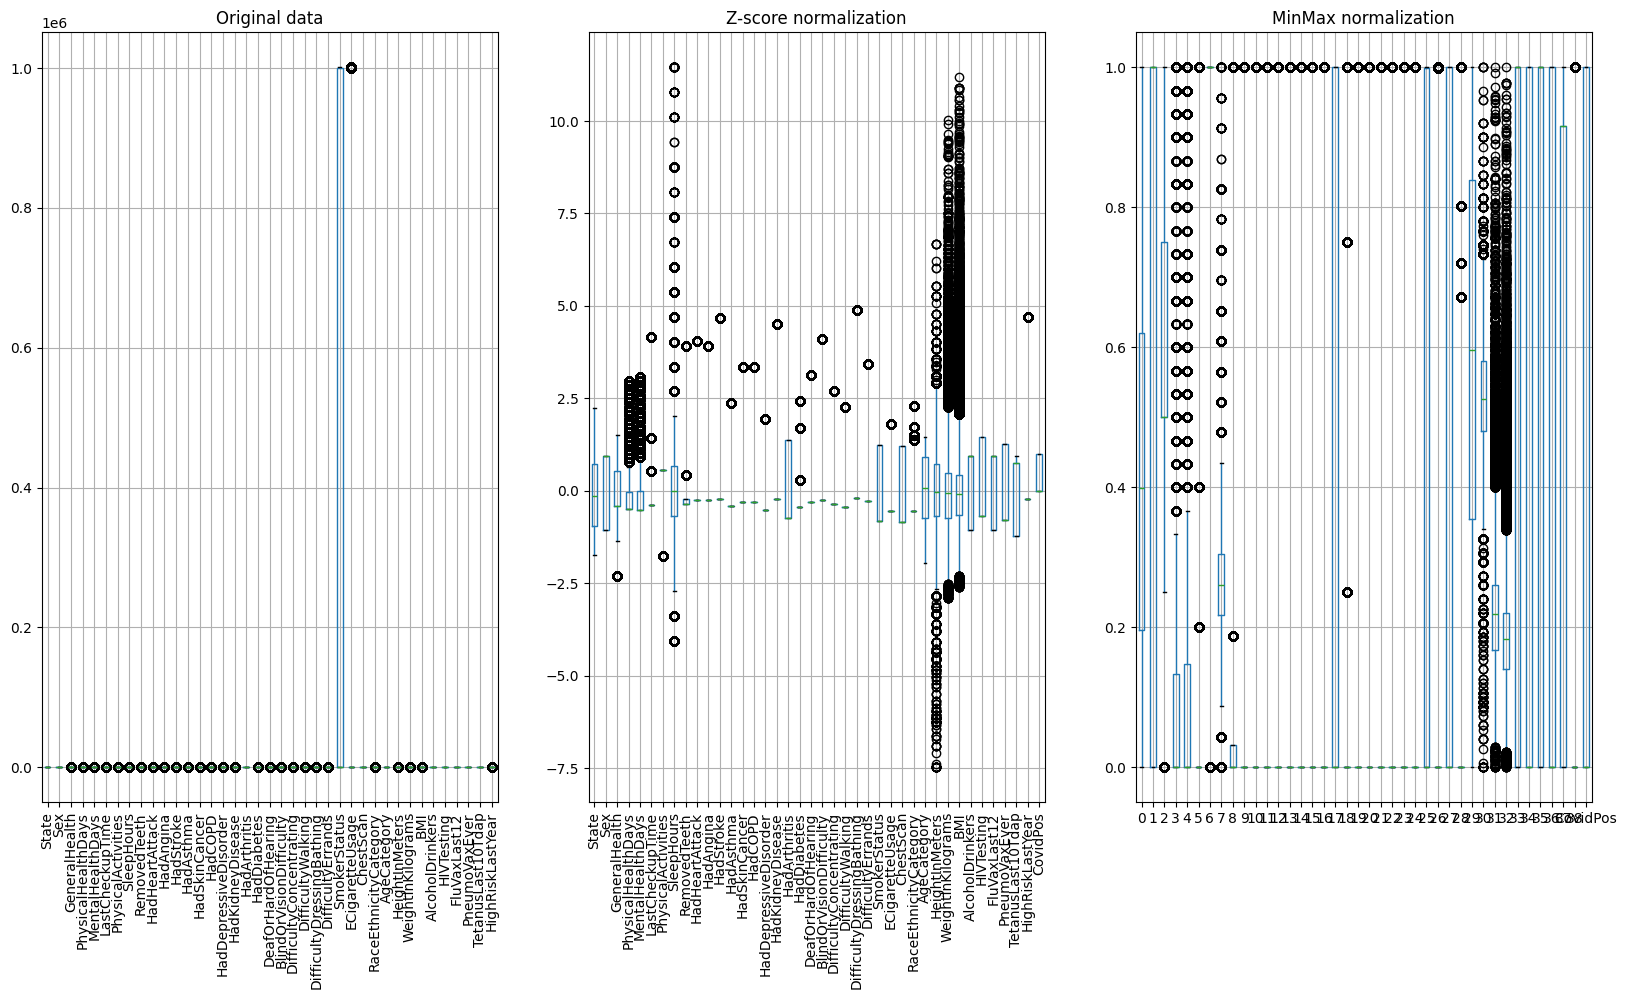

In [4]:
from matplotlib.pyplot import subplots, show

fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)

# Plot for Original data
axs[0, 0].set_title("Original data")
data.boxplot(ax=axs[0, 0])
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), rotation=90)

# Plot for Z-score normalization
axs[0, 1].set_title("Z-score normalization")
df_zscore.boxplot(ax=axs[0, 1])
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), rotation=90)

# Plot for MinMax normalization
axs[0, 2].set_title("MinMax normalization")
df_minmax.boxplot(ax=axs[0, 2])
axs[0, 2].set_xticklabels(axs[0, 2].get_xticklabels())

# Save the figure to a file
fig.savefig("scaled_data_1.png", dpi=300, bbox_inches='tight')

show()
